1. Setup

In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Cancer_Rates.csv')

In [72]:
data.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FID           27 non-null     int64  
 1   ZIP           27 non-null     int64  
 2   Colorectal    27 non-null     float64
 3   Lung_Bronc    27 non-null     float64
 4   Breast_Can    27 non-null     float64
 5   Prostate_C    27 non-null     float64
 6   Urinary_Sy    27 non-null     float64
 7   All_Cancer    27 non-null     float64
 8   SHAPE_Length  27 non-null     float64
 9   SHAPE_Area    27 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 2.2 KB


In [76]:
data_points = [
    {'Colorectal': 200.0, 'Breast_Can': 400.0, 'Lung_Bronc': 350.0, 'Prostate_C': 250.0},
    {'Colorectal': 300.0, 'Breast_Can': 500.0, 'Lung_Bronc': 400.0, 'Prostate_C': 200.0},
    {'Colorectal': 250.0, 'Breast_Can': 450.0, 'Lung_Bronc': 300.0, 'Prostate_C': 350.0},
    {'Colorectal': 350.0, 'Breast_Can': 550.0, 'Lung_Bronc': 250.0, 'Prostate_C': 300.0},
    {'Colorectal': 400.0, 'Breast_Can': 300.0, 'Lung_Bronc': 200.0, 'Prostate_C': 400.0}
]
    

2. Multicollinearity

In [79]:
selected_predictors = ['Prostate_C', 'Colorectal', 'Breast_Can',
        'Lung_Bronc', 'Urinary_Sy']

In [81]:
X = data[selected_predictors]

array([[<Axes: xlabel='Prostate_C', ylabel='Prostate_C'>,
        <Axes: xlabel='Colorectal', ylabel='Prostate_C'>,
        <Axes: xlabel='Breast_Can', ylabel='Prostate_C'>,
        <Axes: xlabel='Lung_Bronc', ylabel='Prostate_C'>,
        <Axes: xlabel='Urinary_Sy', ylabel='Prostate_C'>],
       [<Axes: xlabel='Prostate_C', ylabel='Colorectal'>,
        <Axes: xlabel='Colorectal', ylabel='Colorectal'>,
        <Axes: xlabel='Breast_Can', ylabel='Colorectal'>,
        <Axes: xlabel='Lung_Bronc', ylabel='Colorectal'>,
        <Axes: xlabel='Urinary_Sy', ylabel='Colorectal'>],
       [<Axes: xlabel='Prostate_C', ylabel='Breast_Can'>,
        <Axes: xlabel='Colorectal', ylabel='Breast_Can'>,
        <Axes: xlabel='Breast_Can', ylabel='Breast_Can'>,
        <Axes: xlabel='Lung_Bronc', ylabel='Breast_Can'>,
        <Axes: xlabel='Urinary_Sy', ylabel='Breast_Can'>],
       [<Axes: xlabel='Prostate_C', ylabel='Lung_Bronc'>,
        <Axes: xlabel='Colorectal', ylabel='Lung_Bronc'>,
        <Ax

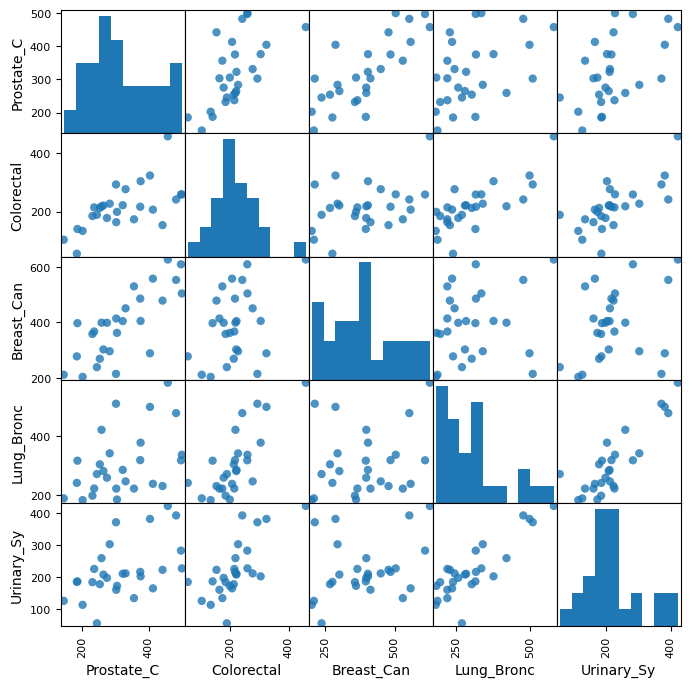

In [83]:
pd.plotting.scatter_matrix(X, figsize=(8,8), alpha=0.8, marker='o',
            diagonal='hist')               

In [85]:
#VIF (Variance Inflation Factor)
for i in range(X.shape[1]):
    vif = inf.variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]}: \t{vif:10.3f}")

VIF for Prostate_C: 	    42.567
VIF for Colorectal: 	    28.232
VIF for Breast_Can: 	    26.942
VIF for Lung_Bronc: 	    42.255
VIF for Urinary_Sy: 	    32.020


3. Simple Linear Regression

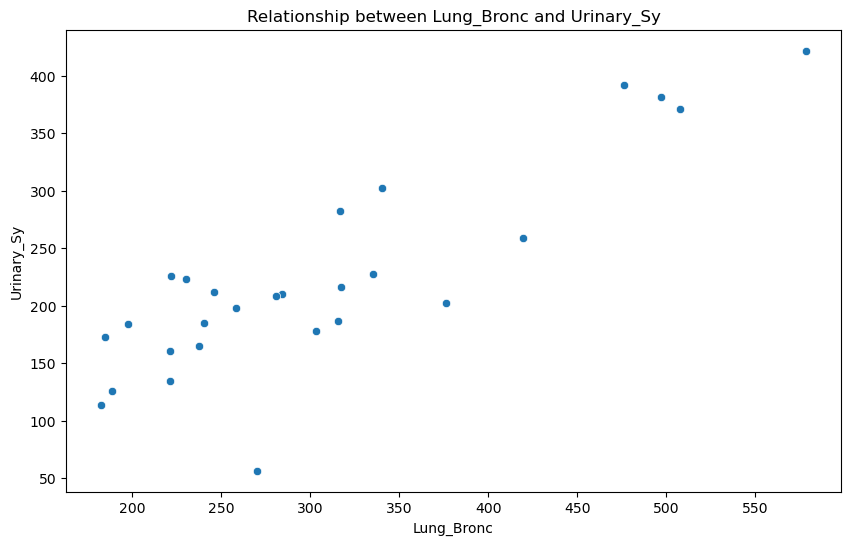

In [88]:
X = data['Lung_Bronc']
y = data['Urinary_Sy']

plt.figure(figsize=(10,6))
sns.scatterplot(x='Lung_Bronc', y='Urinary_Sy', data=data)
plt.title('Relationship between Lung_Bronc and Urinary_Sy')
plt.show()

In [90]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Urinary_Sy   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     71.55
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           8.38e-09
Time:                        04:12:00   Log-Likelihood:                -140.39
No. Observations:                  27   AIC:                             284.8
Df Residuals:                      25   BIC:                             287.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1898     26.887      0.267      0.791     -48.186      62.566
Lung_Bronc     0.7036      0.083      8.459      0.000       0.532       0.875
==============================================================================
Omnibus:                       10.107   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.776
Skew:                          -1.061   Prob(JB):                       0.0124
Kurtosis:                       4.816   Cond. No.                         991.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Model equation: 

    Urinary_Sy = 7.1898 - 0.7036 x Lung_Bronc

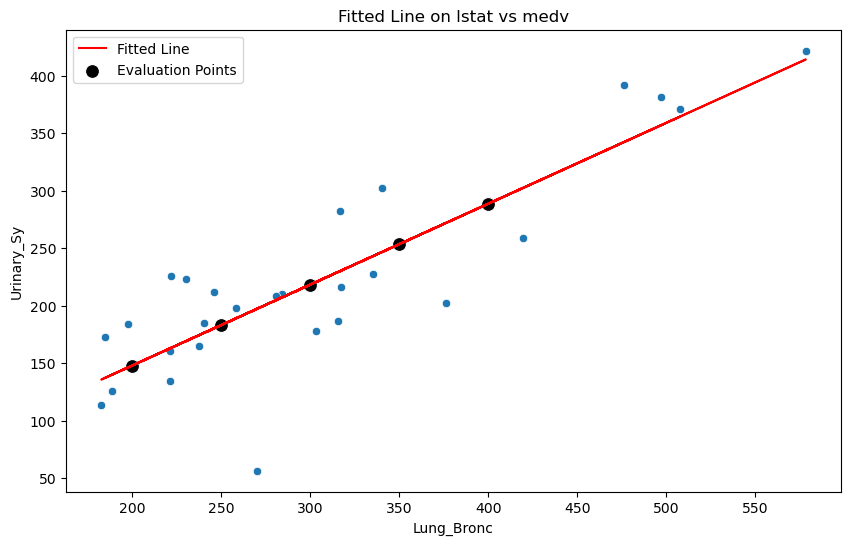

In [93]:
# Plotting the regression line and evaluation points
# Get a list of the evaluation points for Lung_Bronc
Lung_Bronc_values = []

for point in data_points:
    Lung_Bronc_values.append(point['Lung_Bronc'])
    
# Least squares coefficients
beta_1 = model.params['Lung_Bronc']
beta_0 = model.params['const']

# Extracting medv values using the regression equation for these lstat values
Urinary_Sy_values = beta_0 + beta_1 * np.array(Lung_Bronc_values)

# Original plot with scatter points and regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Lung_Bronc'], y=data['Urinary_Sy'])

plt.plot(data['Lung_Bronc'], beta_0 + beta_1 * data['Lung_Bronc'], color='red', label="Fitted Line")

# Adding the points from the dictionary with a different color and size
sns.scatterplot(x=Lung_Bronc_values, y=Urinary_Sy_values, color='black', s=100, label="Evaluation Points")

# Title and legend
plt.title('Fitted Line on lstat vs medv')
plt.legend()
plt.show()

4. Multiple Linear Regression

In [96]:
# Subset of the data with 4 predictors
X = pd.DataFrame(data[['Prostate_C', 'Colorectal','Breast_Can','Lung_Bronc']])
y = data['Urinary_Sy']
# Fiting a Linear Model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Urinary_Sy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.09e-06
Time:                        04:12:23   Log-Likelihood:                -139.02
No. Observations:                  27   AIC:                             288.0
Df Residuals:                      22   BIC:                             294.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.5721     36.343     -0.676      0.506     -99.942      50.798
Prostate_C     0.1223      0.171      0.714      0.483      -0.233       0.477
Colorectal     0.0197      0.207      0.095      0.925      -0.409       0.448
Breast_Can     0.0251      0.123      0.204      0.840      -0.229       0.280
Lung_Bronc     0.6333      0.135      4.689      0.000       0.353       0.913
==============================================================================
Omnibus:                        8.858   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.115
Skew:                          -0.999   Prob(JB):                       0.0285
Kurtosis:                       4.529   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5.1. Model equation:

Urinary_Sy = -24.5721 + 0.1223 x Prostate_C + 0.0197 x Colorectal + 0.0251 x Breast_Can + 0.6333 x Lung_Bronc

In [100]:
# Get lists of the evaluation points for all predictors
Prostate_C_values = []
Colorectal_values = []
Breast_Can_values = []
Lung_Bronc_values = []

for point in data_points:
    Prostate_C_values.append(point['Prostate_C'])
    Colorectal_values.append(point['Colorectal'])
    Breast_Can_values.append(point['Breast_Can'])
    Lung_Bronc_values.append(point['Lung_Bronc']
                   )
# Extracting coefficients from the model
beta_0 = model.params['const']
beta_Prostate_C = model.params['Prostate_C']
beta_Colorectal = model.params['Colorectal']
beta_Breast_Can = model.params['Breast_Can']
beta_Lung_Bronc = model.params['Lung_Bronc']

# Calculating medv values using the multiple regression equation
Urinary_Sy_values = (beta_0 + beta_Prostate_C *np.array(Prostate_C_values) +
beta_Colorectal * np.array(Colorectal_values) +
beta_Breast_Can * np.array(Breast_Can_values) +
beta_Lung_Bronc * np.array(Lung_Bronc_values))
                               
# Printing the medv values along with the predictor values
for i, (Prostate_C, Colorectal, Breast_Can, Lung_Bronc, Urinary_Sy) in enumerate(zip(Prostate_C_values, Colorectal_values, Breast_Can_values, Lung_Bronc_values, Urinary_Sy_values)):
                               print(f"Data Point {i+1} - Prostate_C: {Prostate_C:.2f}, Colorectal: {Colorectal:.2f}, Breast_Can: {Breast_Can:.2f}, Lung_Bronc: {Lung_Bronc:.2f}, Estimated Urinary_Sy: {Urinary_Sy:.2f}")

Data Point 1 - Prostate_C: 250.00, Colorectal: 200.00, Breast_Can: 400.00, Lung_Bronc: 350.00, Estimated Urinary_Sy: 241.64
Data Point 2 - Prostate_C: 200.00, Colorectal: 300.00, Breast_Can: 500.00, Lung_Bronc: 400.00, Estimated Urinary_Sy: 271.67
Data Point 3 - Prostate_C: 350.00, Colorectal: 250.00, Breast_Can: 450.00, Lung_Bronc: 300.00, Estimated Urinary_Sy: 224.44
Data Point 4 - Prostate_C: 300.00, Colorectal: 350.00, Breast_Can: 550.00, Lung_Bronc: 250.00, Estimated Urinary_Sy: 191.13
Data Point 5 - Prostate_C: 400.00, Colorectal: 400.00, Breast_Can: 300.00, Lung_Bronc: 200.00, Estimated Urinary_Sy: 166.42


5. Logistic Regression

In [103]:
median_Prostate_C = data['Prostate_C'].median()
data['High_Prostate_C'] = np.where(data['Prostate_C'] > median_Prostate_C, 1, 0)

In [105]:
data.describe()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area,High_Prostate_C
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000
mean,14.000000,60053.555556,215.662049,305.559073,392.842186,320.079975,222.191454,2628.278959,146386.746889,4.695389e+08,0.481481
std,7.937254,27.169459,77.162061,107.413853,122.334193,100.547764,87.796594,694.582068,54274.898427,2.938934e+08,0.509175
min,1.000000,60002.000000,55.555556,182.810215,203.903701,145.973430,56.610894,1465.294184,25907.372467,1.780943e+07,0.000000
25%,7.500000,60037.500000,175.618187,226.001013,292.531320,249.675972,175.552775,2211.783855,107057.014342,2.202751e+08,0.000000
50%,14.000000,60047.000000,214.198286,280.606615,398.749247,303.270042,208.090299,2581.845035,161457.245301,3.919550e+08,0.000000
75%,20.500000,60078.000000,249.823041,337.896841,482.168766,390.328403,243.300729,3039.894429,179404.536027,6.772510e+08,1.000000
max,27.000000,60099.000000,457.776172,578.243585,626.430551,499.819885,421.635947,4505.481267,247258.224672,1.149062e+09,1.000000


In [107]:
data.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area,High_Prostate_C
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09,0
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08,1
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08,1
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08,0
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08,1


In [109]:
X = data[['Colorectal', 'Lung_Bronc']]
X = sm.add_constant(X) # adding a constant for intercept
y = data['High_Prostate_C']


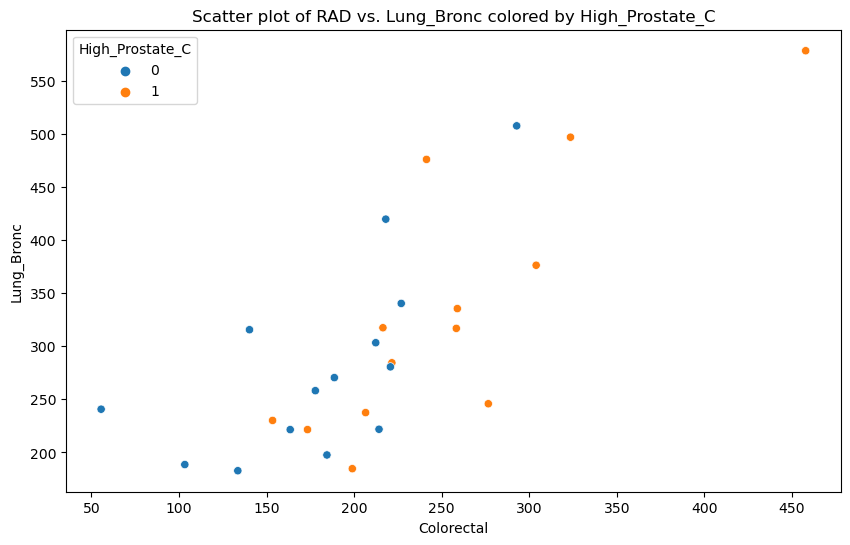

In [111]:
# Visualizing the data
# Scatter plot with color coded for HighCrime
plt.figure(figsize=(10,6))
sns.scatterplot(x='Colorectal', y='Lung_Bronc', hue='High_Prostate_C', data=data)
plt.title('Scatter plot of RAD vs. Lung_Bronc colored by High_Prostate_C')
plt.show()

In [120]:
# Build the logistic regression model
model = sm.Logit(y, X).fit()
# Display model summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.511030
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        High_Prostate_C   No. Observations:                   27
Model:                          Logit   Df Residuals:                       24
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Oct 2023   Pseudo R-squ.:                  0.2620
Time:                        04:15:47   Log-Likelihood:                -13.798
converged:                       True   LL-Null:                       -18.696
Covariance Type:            nonrobust   LLR p-value:                  0.007457
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4749      2.307     -1.939      0.052      -8.997       0.048
Colorectal     0.0350      0.016      2.174      0.030       0.003       0.067
Lung_Bronc    -0.0103      0.008     -1.344      0.179      -0.025       0.005
==============================================================================
"""

In [122]:
# Observations:
# Colorectal: For a one-unit increase in Colorectal, the log odds of High_Prostate_C increase by 0.0.0350, holding other predictors constant.
# It suggests that areas with a higher percentage of colorectal cancer rate, it is more likely to be high prostate cancer rate areas.
# Lung_Bronc: For a one-unit increase in Lung_Bronc, the log odds of High_Prostate_C decreaseby 0.0103, holding other predictors constant.
# It suggests that areas with a higher percentage of lung cancer rate, it is less likely to be high prostate cancer rate areas.
# Constant (Intercept): The constant term is -4.4749, which represents the log odds of High_Prostate_C when all predictors are zero.

log ( p/1-p) = -4.4749 + 0.0350 x Colorectal - 0.0103 x Lung_Bronc

In [125]:
# Extract coefficients from the model
coef_const = model.params['const']
coef_Colorectal = model.params['Colorectal']
coef_Lung_Bronc = model.params['Lung_Bronc']

# Extract predictor values for each point in the evaluation set
# Assuming data_points is your evaluation set
Colorectal_values = [point['Colorectal'] for point in data_points]
Lung_Bronc_values = [point['Lung_Bronc'] for point in data_points]

# Compute the log odds for each point
log_odds = coef_const + coef_Colorectal * np.array(Colorectal_values) + coef_Lung_Bronc * np.array(Lung_Bronc_values)

# Convert log odds to probability
probabilities = 1 / (1 + np.exp(-log_odds))
# Print out the predicted probabilities
for i, prob in enumerate(probabilities):
    print(f"Data Point {i+1}: Probability of High_Prostate_C = {prob:.4f}")

Data Point 1: Probability of High_Prostate_C = 0.2516
Data Point 2: Probability of High_Prostate_C = 0.8693
Data Point 3: Probability of High_Prostate_C = 0.7645
Data Point 4: Probability of High_Prostate_C = 0.9945
Data Point 5: Probability of High_Prostate_C = 0.9994
